In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Dropout
import os
import warnings
from tensorflow import keras
warnings.filterwarnings('ignore')
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
from numpy import mean, std, sqrt, percentile
from scipy.stats import skew, kurtosis

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files
!ls

best_model_fold_1.h5  best_model_fold_5.h5  idle_raw.csv    sample_data
best_model_fold_2.h5  fist_raw.csv	    logout_raw.csv  shield_raw.csv
best_model_fold_3.h5  grenade_raw.csv	    portal_raw.csv  spear_raw.csv
best_model_fold_4.h5  hammer_raw.csv	    reload_raw.csv  spiderweb_raw.csv


## Print the Shape of 20Hz Sample Rate Raw Data

In [ ]:
fist_raw = pd.read_csv('fist_raw.csv')
grenade_raw = pd.read_csv('grenade_raw.csv')
hammer_raw = pd.read_csv('hammer_raw.csv')
logout_raw = pd.read_csv('logout_raw.csv')
portal_raw = pd.read_csv('portal_raw.csv')
reload_raw = pd.read_csv('reload_raw.csv')
shield_raw = pd.read_csv('shield_raw.csv')
spear_raw = pd.read_csv('spear_raw.csv')
spiderweb_raw = pd.read_csv('spiderweb_raw.csv')
idle_raw = pd.read_csv('idle_raw.csv')

print(f'Shape of fist raw is: {fist_raw.shape}')
print(f'Shape of grenade raw is: {grenade_raw.shape}')
print(f'Shape of hammer raw is: {hammer_raw.shape}')
print(f'Shape of logout raw is: {logout_raw.shape}')
print(f'Shape of portal raw is: {portal_raw.shape}')
print(f'Shape of reload raw is: {reload_raw.shape}')
print(f'Shape of shield raw is: {shield_raw.shape}')
print(f'Shape of spear raw is: {spear_raw.shape}')
print(f'Shape of spiderweb raw is: {spiderweb_raw.shape}')
print(f'Shape of idle raw is: {idle_raw.shape}')

Shape of fist raw is: (13640, 6)
Shape of grenade raw is: (14480, 6)
Shape of hammer raw is: (9360, 6)
Shape of logout raw is: (6760, 6)
Shape of portal raw is: (9240, 6)
Shape of reload raw is: (8480, 6)
Shape of shield raw is: (10040, 6)
Shape of spear raw is: (9560, 6)
Shape of spiderweb raw is: (9560, 6)
Shape of idle raw is: (5680, 6)


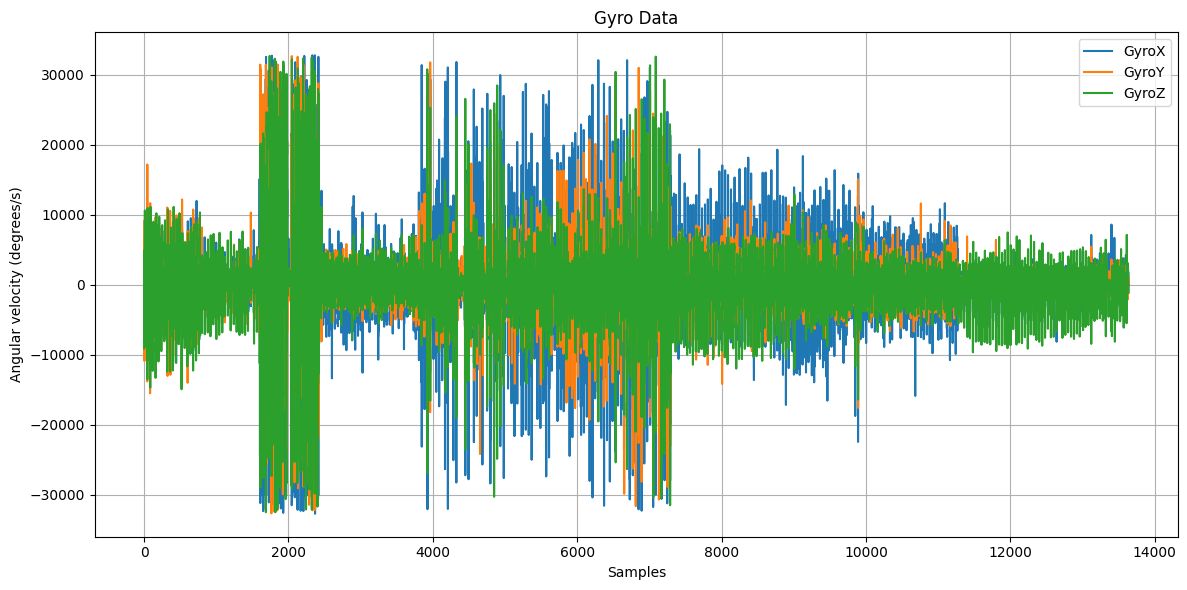

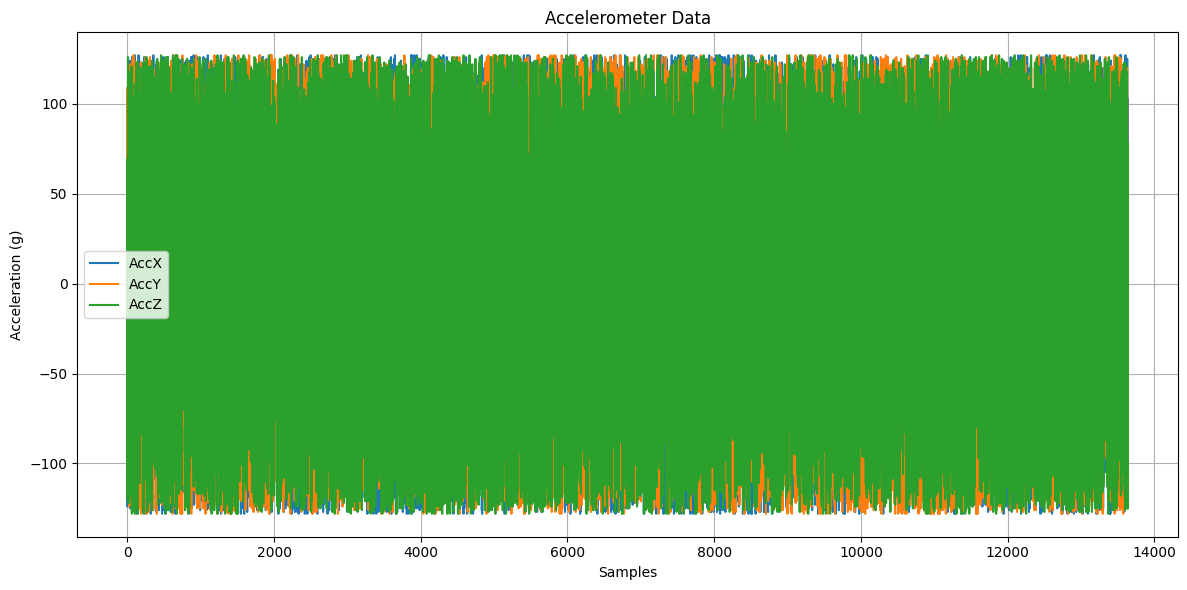

In [ ]:
import matplotlib.pyplot as plt

df_subset = fist_raw.iloc[:, :]

# Plotting gyro data
df_subset[['GyroX', 'GyroY', 'GyroZ']].plot(figsize=(12, 6), title='Gyro Data')
plt.ylabel("Angular velocity (degrees/s)")
plt.xlabel("Samples")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting accel data
df_subset[['AccX', 'AccY', 'AccZ']].plot(figsize=(12, 6), title='Accelerometer Data')
plt.ylabel("Acceleration (g)")
plt.xlabel("Samples")
plt.grid(True)
plt.tight_layout()
plt.show()


## Create Window

In [ ]:
# Function to create windows for input
def create_window(dataframe, window_size=40, overlap=40):
    num_windows = (len(dataframe) - window_size) // overlap + 1
    window = np.zeros((num_windows, window_size, dataframe.shape[1]))

    for i in range(num_windows):
        start = i * overlap
        end = start + window_size
        window[i] = dataframe.iloc[start:end].values

    return window


In [ ]:
# Create inputs and labels for each class
fist_input = create_window(fist_raw)
grenade_input = create_window(grenade_raw)
hammer_input = create_window(hammer_raw)
logout_input = create_window(logout_raw)
portal_input = create_window(portal_raw)
reload_input = create_window(reload_raw)
shield_input = create_window(shield_raw)
spear_input = create_window(spear_raw)
spiderweb_input = create_window(spiderweb_raw)
idle_input = create_window(idle_raw)

## Early train test split

In [ ]:
def split_ndarray(array, percentage=0.20):

    total_elements = array.shape[0]
    num_to_select = int(total_elements * percentage)
    selected_indices = np.random.choice(total_elements, size=num_to_select, replace=False)

    # Create a boolean array where True indicates the selected indices
    selection_array = np.zeros(total_elements, dtype=bool)
    selection_array[selected_indices] = True

    # Use the boolean array to create the splits
    selected_array = array[selection_array]
    remaining_array = array[~selection_array]

    return selected_array, remaining_array

In [ ]:
fist_test, fist_input = split_ndarray(fist_input)
grenade_test, grenade_input = split_ndarray(grenade_input)
hammer_test, hammer_input = split_ndarray(hammer_input)
logout_test, logout_input = split_ndarray(logout_input)
portal_test, portal_input = split_ndarray(portal_input)
reload_test, reload_input = split_ndarray(reload_input)
shield_test, shield_input = split_ndarray(shield_input)
spear_test, spear_input = split_ndarray(spear_input)
spiderweb_test, spiderweb_input = split_ndarray(spiderweb_input)
idle_test, idle_input = split_ndarray(idle_input)

## Normalize each window

In [ ]:
# max abs normalisation, X.shape = (40, 6)
def normalize_windows(X):
    X_normalized = np.zeros_like(X)
    # for every of the 6 columns
    for i in range(X.shape[1]):
        column = np.abs(X[:, i])
        col_maxabs = np.max(np.abs(np.abs(X[:, i])))
        X_normalized[:, i] = X[:, i] / col_maxabs
    return X_normalized

In [ ]:
fist_norm = normalize_windows(fist_input)
grenade_norm = normalize_windows(grenade_input)
hammer_norm = normalize_windows(hammer_input)
logout_norm = normalize_windows(logout_input)
portal_norm = normalize_windows(portal_input)
reload_norm = normalize_windows(reload_input)
shield_norm = normalize_windows(shield_input)
spear_norm = normalize_windows(spear_input)
spiderweb_norm = normalize_windows(spiderweb_input)
idle_norm = normalize_windows(idle_input)

fist_test_norm = normalize_windows(fist_test)
grenade_test_norm = normalize_windows(grenade_test)
hammer_test_norm = normalize_windows(hammer_test)
logout_test_norm = normalize_windows(logout_test)
portal_test_norm = normalize_windows(portal_test)
reload_test_norm = normalize_windows(reload_test)
shield_test_norm = normalize_windows(shield_test)
spear_test_norm = normalize_windows(spear_test)
spiderweb_test_norm = normalize_windows(spiderweb_test)
idle_test_norm = normalize_windows(idle_test)

## Data augmentation

In [ ]:
from scipy.interpolate import CubicSpline      # for warping

def DA_Jitter(X, sigma=0.05):
    myNoise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    return X+myNoise

def DA_Scaling(X, sigma=0.1):
    scalingFactor = np.random.normal(loc=1.0, scale=sigma, size=(1,X.shape[1])) # shape=(1,3)
    myNoise = np.matmul(np.ones((X.shape[0],1)), scalingFactor)
    print(myNoise.shape)
    return X*myNoise

def GenerateRandomCurves(X, sigma=0.2, knot=4):
    xx = (np.ones((X.shape[1],1))*(np.arange(0,X.shape[0], (X.shape[0]-1)/(knot+1)))).transpose()
    yy = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, X.shape[1]))
    x_range = np.arange(X.shape[0])
    cs_x = CubicSpline(xx[:,0], yy[:,0])
    cs_y = CubicSpline(xx[:,1], yy[:,1])
    cs_z = CubicSpline(xx[:,2], yy[:,2])
    return np.array([cs_x(x_range),cs_y(x_range),cs_z(x_range),cs_x(x_range),cs_y(x_range),cs_z(x_range)]).transpose()
def DA_MagWarp(X, sigma=0.2):
    return X * GenerateRandomCurves(X, sigma)

def DistortTimesteps(X, sigma=0.2):
    tt = GenerateRandomCurves(X, sigma) # Regard these samples aroun 1 as time intervals
    tt_cum = np.cumsum(tt, axis=0)        # Add intervals to make a cumulative graph
    # Make the last value to have X.shape[0]
    t_scale = [(X.shape[0]-1)/tt_cum[-1,0],(X.shape[0]-1)/tt_cum[-1,1],(X.shape[0]-1)/tt_cum[-1,2],(X.shape[0]-1)/tt_cum[-1,3],(X.shape[0]-1)/tt_cum[-1,4],(X.shape[0]-1)/tt_cum[-1,5]]
    tt_cum[:,0] = tt_cum[:,0]*t_scale[0]
    tt_cum[:,1] = tt_cum[:,1]*t_scale[1]
    tt_cum[:,2] = tt_cum[:,2]*t_scale[2]
    tt_cum[:,3] = tt_cum[:,3]*t_scale[3]
    tt_cum[:,4] = tt_cum[:,4]*t_scale[4]
    tt_cum[:,5] = tt_cum[:,5]*t_scale[5]
    return tt_cum
def DA_TimeWarp(X, sigma=0.02):
    tt_new = DistortTimesteps(X, sigma)
    X_new = np.zeros(X.shape)
    x_range = np.arange(X.shape[0])
    X_new[:,0] = np.interp(x_range, tt_new[:,0], X[:,0])
    X_new[:,1] = np.interp(x_range, tt_new[:,1], X[:,1])
    X_new[:,2] = np.interp(x_range, tt_new[:,2], X[:,2])
    X_new[:,3] = np.interp(x_range, tt_new[:,3], X[:,3])
    X_new[:,4] = np.interp(x_range, tt_new[:,4], X[:,4])
    X_new[:,5] = np.interp(x_range, tt_new[:,5], X[:,5])
    return X_new

In [ ]:
def augment(X):
    # return DA_TimeWarp(DA_MagWarp(X))
    return X

ratio = 1

In [ ]:
fist_aug = np.zeros((fist_norm.shape[0]*ratio, 40, 6))
for i in range(fist_norm.shape[0]):
    for j in range(ratio):
        fist_aug[ratio*i+j] = augment(fist_norm[i])

grenade_aug = np.zeros((grenade_norm.shape[0]*ratio, 40, 6))
for i in range(grenade_norm.shape[0]):
    for j in range(ratio):
        grenade_aug[ratio*i+j] = augment(grenade_norm[i])

hammer_aug = np.zeros((hammer_norm.shape[0]*ratio, 40, 6))
for i in range(hammer_norm.shape[0]):
    for j in range(ratio):
        hammer_aug[ratio*i+j] = augment(hammer_norm[i])

logout_aug = np.zeros((logout_norm.shape[0]*ratio, 40, 6))
for i in range(logout_norm.shape[0]):
    for j in range(ratio):
        logout_aug[ratio*i+j] = augment(logout_norm[i])

portal_aug = np.zeros((portal_norm.shape[0]*ratio, 40, 6))
for i in range(portal_norm.shape[0]):
    for j in range(ratio):
        portal_aug[ratio*i+j] = augment(portal_norm[i])

reload_aug = np.zeros((reload_norm.shape[0]*ratio, 40, 6))
for i in range(reload_norm.shape[0]):
    for j in range(ratio):
        reload_aug[ratio*i+j] = augment(reload_norm[i])

shield_aug = np.zeros((shield_norm.shape[0]*ratio, 40, 6))
for i in range(shield_norm.shape[0]):
    for j in range(ratio):
        shield_aug[ratio*i+j] = augment(shield_norm[i])

spear_aug = np.zeros((spear_norm.shape[0]*ratio, 40, 6))
for i in range(spear_norm.shape[0]):
    for j in range(ratio):
        spear_aug[ratio*i+j] = augment(spear_norm[i])

spiderweb_aug = np.zeros((spiderweb_norm.shape[0]*ratio, 40, 6))
for i in range(spiderweb_norm.shape[0]):
    for j in range(ratio):
        spiderweb_aug[ratio*i+j] = augment(spiderweb_norm[i])

idle_aug = np.zeros((idle_norm.shape[0]*ratio, 40, 6))
for i in range(idle_norm.shape[0]):
    for j in range(ratio):
        idle_aug[ratio*i+j] = augment(idle_norm[i])

## See effect of augmentation

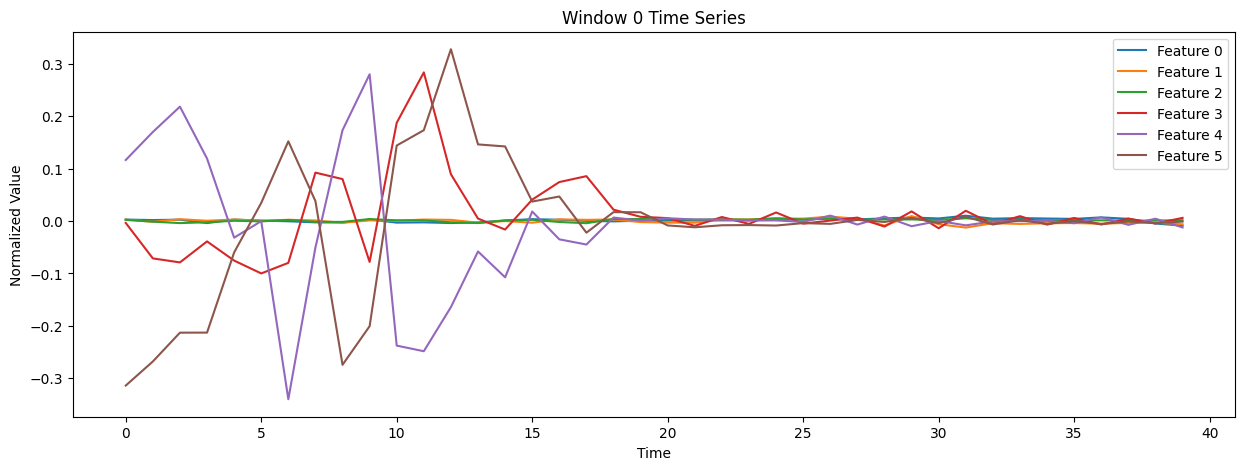

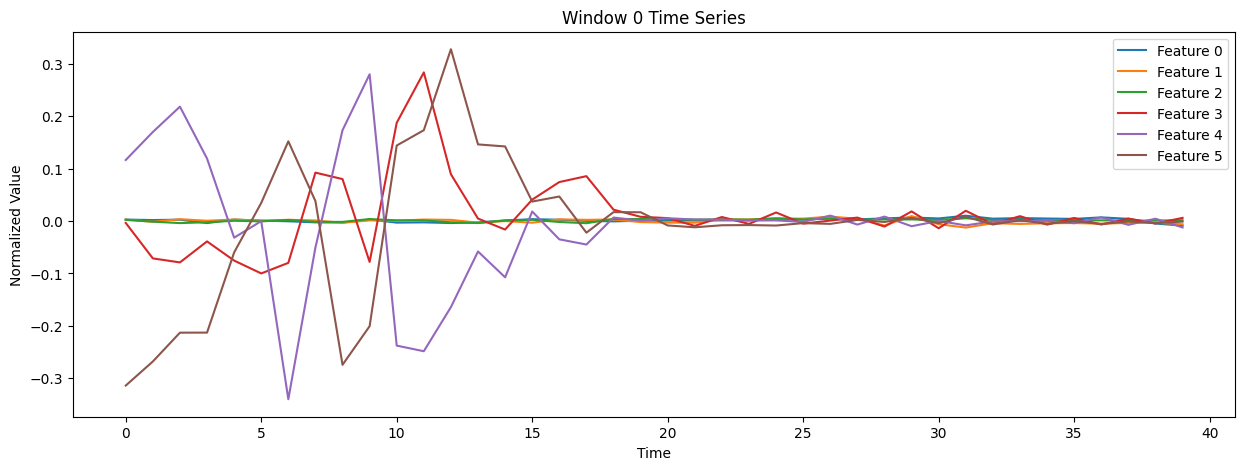

In [ ]:
import matplotlib.pyplot as plt
# Define a function to plot the data for each window
def plot_time_series(X_normalized, window_index):
    plt.figure(figsize=(15, 5))
    for i in range(X_normalized.shape[2]):
        plt.plot(X_normalized[window_index, :, i], label=f'Feature {i}')
    plt.title(f'Window {window_index} Time Series')
    plt.xlabel('Time')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.show()

plot_time_series(fist_norm, 0)
plot_time_series(fist_aug, 0)


## Feature Extraction for each window

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks

def extract_features(window, label):
    features = []

    for col in window.columns:
        # Time domain features
        tmean = np.mean(window[col])
        tstd = np.std(window[col])
        t25percentile = np.percentile(window[col], 25)
        t50percentile = np.percentile(window[col], 50)  # median
        t75percentile = np.percentile(window[col], 75)
        tIQR = t75percentile - t25percentile  # interquartile range
        zero_crossings = np.where(np.diff(np.sign(window[col])))[0].size  # zero-crossings
        tMAD = np.mean(np.abs(window[col] - tmean))

        features.extend([
            # tmean,
            # tstd,
            t50percentile,
            tIQR,
            zero_crossings,
            tMAD,
            skew(window[col]),
            kurtosis(window[col])
        ])

        # Frequency domain features
        freq_domain = np.fft.rfft(window[col])
        freq_magnitude = np.abs(freq_domain)
        freq_axis = np.fft.rfftfreq(len(window[col]))

        fmean = np.mean(freq_magnitude)
        fmax = np.max(freq_magnitude)
        dominant_freq = freq_axis[np.argmax(freq_magnitude)]
        energy = np.sum(np.square(freq_magnitude)) / 10000  # divided by 100^2
        fsum = np.sum(freq_magnitude)
        entropy = -np.sum((freq_magnitude / fsum) * np.log2(freq_magnitude / fsum + np.finfo(float).eps))  # spectral entropy


        features.extend([
            fmean,
            fmax,
            dominant_freq,
            energy,
            entropy
        ])

    features.append(label)
    return features


In [ ]:
feature = []

for i in range(fist_aug.shape[0]):
    window = pd.DataFrame(fist_aug[i])
    features = extract_features(window, "fist")
    feature.append(features)
for i in range(grenade_aug.shape[0]):
    window = pd.DataFrame(grenade_aug[i])
    features = extract_features(window, "grenade")
    feature.append(features)
for i in range(hammer_aug.shape[0]):
    window = pd.DataFrame(hammer_aug[i])
    features = extract_features(window, "hammer")
    feature.append(features)
for i in range(logout_aug.shape[0]):
    window = pd.DataFrame(logout_aug[i])
    features = extract_features(window, "logout")
    feature.append(features)
for i in range(portal_aug.shape[0]):
    window = pd.DataFrame(portal_aug[i])
    features = extract_features(window, "portal")
    feature.append(features)
for i in range(reload_aug.shape[0]):
    window = pd.DataFrame(reload_aug[i])
    features = extract_features(window, "reload")
    feature.append(features)
for i in range(shield_aug.shape[0]):
    window = pd.DataFrame(shield_aug[i])
    features = extract_features(window, "shield")
    feature.append(features)
for i in range(spear_aug.shape[0]):
    window = pd.DataFrame(spear_aug[i])
    features = extract_features(window, "spear")
    feature.append(features)
for i in range(spiderweb_aug.shape[0]):
    window = pd.DataFrame(spiderweb_aug[i])
    features = extract_features(window, "spiderweb")
    feature.append(features)
for i in range(idle_aug.shape[0]):
    window = pd.DataFrame(idle_aug[i])
    features = extract_features(window, "idle")
    feature.append(features)
columns = [
    f'{col}_{stat}' for col in window.columns
    for stat in [
        # 'tmean', 'tstd',
        't50percentile',
        'tIQR', 'zero_crossings', 'tMAD', 'tskew', 'tkurtosis',
        'fmean', 'fmax', 'dominant_freq',
        'fenergy', 'fentropy'
    ]
]
columns.append('label')
feature_df = pd.DataFrame(feature, columns=columns)  # make sure `features` is the list of extracted features.


print(feature_df)

      0_t50percentile    0_tIQR  0_zero_crossings    0_tMAD   0_tskew  \
0            0.002237  0.004617                 9  0.002905 -0.396349   
1           -0.001304  0.006506                10  0.003971 -0.134320   
2           -0.002150  0.006232                 9  0.003526  0.062917   
3            0.000481  0.005786                12  0.003275  0.286970   
4            0.000178  0.004976                17  0.003475 -0.437464   
...               ...       ...               ...       ...       ...   
1936        -0.001428  0.011095                12  0.005858  0.067074   
1937         0.002783  0.013239                13  0.007639 -0.301870   
1938        -0.003461  0.010640                16  0.004896  0.052785   
1939        -0.002617  0.011328                14  0.006321  0.542778   
1940         0.000156  0.011914                25  0.006432 -0.097338   

      0_tkurtosis   0_fmean    0_fmax  0_dominant_freq  0_fenergy  ...  \
0        0.312662  0.021408  0.065457            

In [ ]:
feature = []

for i in range(fist_test_norm.shape[0]):
    window = pd.DataFrame(fist_test_norm[i])
    features = extract_features(window, "fist")
    feature.append(features)
for i in range(grenade_test_norm.shape[0]):
    window = pd.DataFrame(grenade_test_norm[i])
    features = extract_features(window, "grenade")
    feature.append(features)
for i in range(hammer_test_norm.shape[0]):
    window = pd.DataFrame(hammer_test_norm[i])
    features = extract_features(window, "hammer")
    feature.append(features)
for i in range(logout_test_norm.shape[0]):
    window = pd.DataFrame(logout_test_norm[i])
    features = extract_features(window, "logout")
    feature.append(features)
for i in range(portal_test_norm.shape[0]):
    window = pd.DataFrame(portal_test_norm[i])
    features = extract_features(window, "portal")
    feature.append(features)
for i in range(reload_test_norm.shape[0]):
    window = pd.DataFrame(reload_test_norm[i])
    features = extract_features(window, "reload")
    feature.append(features)
for i in range(shield_test_norm.shape[0]):
    window = pd.DataFrame(shield_test_norm[i])
    features = extract_features(window, "shield")
    feature.append(features)
for i in range(spear_test_norm.shape[0]):
    window = pd.DataFrame(spear_test_norm[i])
    features = extract_features(window, "spear")
    feature.append(features)
for i in range(spiderweb_test_norm.shape[0]):
    window = pd.DataFrame(spiderweb_test_norm[i])
    features = extract_features(window, "spiderweb")
    feature.append(features)
for i in range(idle_test_norm.shape[0]):
    window = pd.DataFrame(idle_test_norm[i])
    features = extract_features(window, "idle")
    feature.append(features)
columns = [
    f'{col}_{stat}' for col in window.columns
    for stat in [
        # 'tmean', 'tstd',
        't50percentile',
        'tIQR', 'zero_crossings', 'tMAD', 'tskew', 'tkurtosis',
        'fmean', 'fmax', 'dominant_freq',
        'fenergy', 'fentropy'
    ]
]
columns.append('label')
test_df = pd.DataFrame(feature, columns=columns)  # make sure `features` is the list of extracted features.


print(test_df)

     0_t50percentile    0_tIQR  0_zero_crossings    0_tMAD   0_tskew  \
0           0.002129  0.010647                 9  0.008760  1.381722   
1           0.001650  0.006677                12  0.009725 -0.571122   
2          -0.000609  0.007719                14  0.009566 -0.385102   
3           0.000895  0.009509                13  0.009328 -0.641551   
4           0.000707  0.007791                13  0.009276 -0.659874   
..               ...       ...               ...       ...       ...   
474        -0.000516  0.012743                23  0.007135 -0.182606   
475         0.000600  0.012607                20  0.007206  0.243399   
476        -0.003566  0.009210                13  0.006627  0.331335   
477         0.002428  0.009822                18  0.006748 -0.247400   
478         0.004845  0.011014                14  0.006233 -0.469604   

     0_tkurtosis   0_fmean    0_fmax  0_dominant_freq  0_fenergy  ...  \
0       1.052952  0.062684  0.258228            0.000   0.0000

<Axes: >

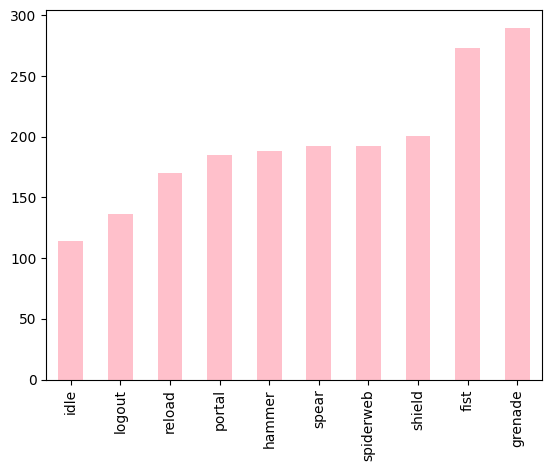

In [ ]:
shuffled_df = feature_df.sample(frac = 1)
shuffled_df['label'].value_counts().sort_values().plot(kind = 'bar', color = 'pink')

In [ ]:
x_data, y_data = shuffled_df.iloc[:, :-1], shuffled_df.iloc[:, -1:]
test_x, test_y = test_df.iloc[:, :-1], test_df.iloc[:, -1:]

x_data = x_data.astype("float32")
test_x = test_x.astype("float32")

In [ ]:
le = LabelEncoder()
y_data = le.fit_transform(y_data)
test_y = le.fit_transform(test_y)
le_name_mapping = dict(zip(le.classes_, le.fit_transform(le.classes_)))
print(le_name_mapping)
print(y_data.shape)
print(test_y.shape)

{'fist': 0, 'grenade': 1, 'hammer': 2, 'idle': 3, 'logout': 4, 'portal': 5, 'reload': 6, 'shield': 7, 'spear': 8, 'spiderweb': 9}
(1941,)
(479,)


## Model Construction

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Set random seed
tf.random.set_seed(42)

# Function to create and compile the model
def build_model():
    model = Sequential()
    model.add(Dense(48, input_dim=66, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(lr=0.001),
                  metrics=["accuracy"])
    return model

# Assuming you have your data in train_x, train_y, val_x, val_y, test_x, test_y

n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

val_scores = []

for train_idx, val_idx in skf.split(x_data, y_data):
    model = build_model()
    checkpoint = ModelCheckpoint("best_model_fold_{}.h5".format(len(val_scores) + 1), monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    train_x_fold = x_data.iloc[train_idx]
    train_y_fold = y_data[train_idx]
    val_x_fold = x_data.iloc[val_idx]
    val_y_fold = y_data[val_idx]

    model.fit(train_x_fold, train_y_fold, epochs=20, validation_data=(val_x_fold, val_y_fold), callbacks=[checkpoint])

    loss, accuracy = model.evaluate(val_x_fold, val_y_fold, verbose=0)
    val_scores.append(accuracy)
    print(f"Fold {len(val_scores)} - Model loss: {loss}")
    print(f"Fold {len(val_scores)} - Model accuracy: {100*accuracy:.2f}%")

print(f"Average accuracy from {n_folds}-fold cross-validation: {100*np.mean(val_scores):.2f}% +/- {100*np.std(val_scores):.2f}%")

# Evaluate the model
loss, accuracy = model.evaluate(test_x, test_y, verbose=0)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")


Epoch 1/20
25/49 [==============>...............] - ETA: 0s - loss: 3.0847 - accuracy: 0.1025 
Epoch 1: val_accuracy improved from -inf to 0.20308, saving model to best_model_fold_1.h5
49/49 [==============================] - 1s 8ms/step - loss: 2.7206 - accuracy: 0.1302 - val_loss: 2.2086 - val_accuracy: 0.2031
Epoch 2/20
49/49 [==============================] - ETA: 0s - loss: 2.0842 - accuracy: 0.2726
Epoch 2: val_accuracy improved from 0.20308 to 0.28278, saving model to best_model_fold_1.h5
49/49 [==============================] - 0s 4ms/step - loss: 2.0842 - accuracy: 0.2726 - val_loss: 2.0017 - val_accuracy: 0.2828
Epoch 3/20
48/49 [============================>.] - ETA: 0s - loss: 1.8972 - accuracy: 0.3431
Epoch 3: val_accuracy improved from 0.28278 to 0.39846, saving model to best_model_fold_1.h5
49/49 [==============================] - 0s 5ms/step - loss: 1.8952 - accuracy: 0.3460 - val_loss: 1.7896 - val_accuracy: 0.3985
Epoch 4/20
48/49 [============================>.] - ET

Fold 1 - Model loss: 0.8958184719085693
Fold 1 - Model accuracy: 73.01%
Epoch 1/20
46/49 [===========================>..] - ETA: 0s - loss: 2.6003 - accuracy: 0.1420
Epoch 1: val_accuracy improved from -inf to 0.21649, saving model to best_model_fold_2.h5
49/49 [==============================] - 1s 8ms/step - loss: 2.5860 - accuracy: 0.1468 - val_loss: 2.2081 - val_accuracy: 0.2165
Epoch 2/20
49/49 [==============================] - ETA: 0s - loss: 2.1258 - accuracy: 0.2344
Epoch 2: val_accuracy improved from 0.21649 to 0.26031, saving model to best_model_fold_2.h5
49/49 [==============================] - 0s 6ms/step - loss: 2.1258 - accuracy: 0.2344 - val_loss: 2.0061 - val_accuracy: 0.2603
Epoch 3/20
46/49 [===========================>..] - ETA: 0s - loss: 1.9092 - accuracy: 0.3105
Epoch 3: val_accuracy improved from 0.26031 to 0.37113, saving model to best_model_fold_2.h5
49/49 [==============================] - 0s 5ms/step - loss: 1.9006 - accuracy: 0.3142 - val_loss: 1.7950 - val_


Fold 2 - Model accuracy: 69.33%
Epoch 1/20
48/49 [============================>.] - ETA: 0s - loss: 2.3561 - accuracy: 0.1263
Epoch 1: val_accuracy improved from -inf to 0.22165, saving model to best_model_fold_3.h5
49/49 [==============================] - 1s 8ms/step - loss: 2.3534 - accuracy: 0.1262 - val_loss: 2.1672 - val_accuracy: 0.2216
Epoch 2/20
47/49 [===========================>..] - ETA: 0s - loss: 2.1364 - accuracy: 0.2108
Epoch 2: val_accuracy improved from 0.22165 to 0.27577, saving model to best_model_fold_3.h5
49/49 [==============================] - 0s 4ms/step - loss: 2.1353 - accuracy: 0.2093 - val_loss: 2.0188 - val_accuracy: 0.2758
Epoch 3/20
49/49 [==============================] - ETA: 0s - loss: 2.0017 - accuracy: 0.2769
Epoch 3: val_accuracy improved from 0.27577 to 0.35825, saving model to best_model_fold_3.h5
49/49 [==============================] - 0s 4ms/step - loss: 2.0017 - accuracy: 0.2769 - val_loss: 1.8813 - val_accuracy: 0.3582
Epoch 4/20
48/49 [====

Epoch 1/20
25/49 [==============>...............] - ETA: 0s - loss: 2.5160 - accuracy: 0.1300 
Epoch 1: val_accuracy improved from -inf to 0.20103, saving model to best_model_fold_4.h5
49/49 [==============================] - 1s 8ms/step - loss: 2.3670 - accuracy: 0.1571 - val_loss: 2.1798 - val_accuracy: 0.2010
Epoch 2/20
45/49 [==========================>...] - ETA: 0s - loss: 2.0736 - accuracy: 0.2424
Epoch 2: val_accuracy improved from 0.20103 to 0.29897, saving model to best_model_fold_4.h5
49/49 [==============================] - 0s 4ms/step - loss: 2.0730 - accuracy: 0.2447 - val_loss: 1.9835 - val_accuracy: 0.2990
Epoch 3/20
48/49 [============================>.] - ETA: 0s - loss: 1.9001 - accuracy: 0.3275
Epoch 3: val_accuracy improved from 0.29897 to 0.37113, saving model to best_model_fold_4.h5
49/49 [==============================] - 0s 5ms/step - loss: 1.9009 - accuracy: 0.3271 - val_loss: 1.8073 - val_accuracy: 0.3711
Epoch 4/20
49/49 [==============================] - ET

Epoch 1/20
46/49 [===========================>..] - ETA: 0s - loss: 3.4714 - accuracy: 0.1338
Epoch 1: val_accuracy improved from -inf to 0.15464, saving model to best_model_fold_5.h5
49/49 [==============================] - 1s 8ms/step - loss: 3.4074 - accuracy: 0.1352 - val_loss: 2.2618 - val_accuracy: 0.1546
Epoch 2/20
49/49 [==============================] - ETA: 0s - loss: 2.1949 - accuracy: 0.1880
Epoch 2: val_accuracy improved from 0.15464 to 0.19845, saving model to best_model_fold_5.h5
49/49 [==============================] - 0s 4ms/step - loss: 2.1949 - accuracy: 0.1880 - val_loss: 2.1120 - val_accuracy: 0.1985
Epoch 3/20
44/49 [=========================>....] - ETA: 0s - loss: 2.0563 - accuracy: 0.2649
Epoch 3: val_accuracy improved from 0.19845 to 0.23969, saving model to best_model_fold_5.h5
49/49 [==============================] - 0s 4ms/step - loss: 2.0502 - accuracy: 0.2698 - val_loss: 1.9866 - val_accuracy: 0.2397
Epoch 4/20
45/49 [==========================>...] - ETA

In [ ]:
print(test_x.iloc[:12, :])

    0_t50percentile    0_tIQR  0_zero_crossings    0_tMAD   0_tskew  \
0          0.043651  1.168651              17.0  0.572421 -0.078621   
1          0.328125  1.373047              12.0  0.616797 -0.351704   
2          0.406250  0.687500              14.0  0.448164 -0.845420   
3          0.265873  1.589286              13.0  0.732103 -0.142267   
4          0.273810  1.301587              14.0  0.626300 -0.236113   
5          0.134921  1.152778              13.0  0.578224 -0.159860   
6         -0.341463  1.558943              10.0  0.651585  0.352810   
7         -0.547619  0.871032              16.0  0.497073  0.935068   
8         -0.365854  1.239837              12.0  0.584512  0.457402   
9          0.059055  0.498031              20.0  0.323228 -0.282906   
10         0.171875  0.410156              14.0  0.347813 -0.765569   
11         0.064000  0.674000              12.0  0.417630 -0.086262   

    0_tkurtosis   0_fmean     0_fmax  0_dominant_freq  0_fenergy  ...  \
0  

## Confusion Matrix

(306, 66)
10/10 [==============================] - 0s 2ms/step
<class 'pandas.core.frame.DataFrame'>
[2 0 9 8 1 3 7 6 1 1 0 0 1 1 0 0 0 0 5 0 1 0 1 0 0 5 1 0 0 0 0 0 5 1 1 8 1
 1 9 6 8 1 9 7 9 9 6 7 1 0 9 1 0 1 1 1 1 1 9 1 1 1 1 0 1 1 1 6 1 6 6 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 6 6 6 0 8 2 8 2 3 2 4 2 4 2 5 2 8 2 9 5 2
 5 3 3 3 0 6 0 3 4 4 4 4 4 9 4 5 4 4 4 4 3 4 4 4 4 4 4 4 4 3 1 2 1 5 5 6 6
 6 5 5 1 7 2 1 2 1 5 5 5 5 5 5 5 7 5 6 5 5 7 7 7 7 6 7 7 6 7 6 9 6 6 6 6 6
 7 7 7 6 1 3 6 6 7 7 6 7 7 7 7 7 7 7 7 7 7 1 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 0 1 1 1 1 0 7 7 1 1 1 0 0 1 0 1 0 1 1 7 1 1 1 1 1 1 1 1 1 6 7
 7 7 7 1 7 6 7 6 7 6 6 1 1 6 6 1 6 1 1 1 1 1 1 1 7 1 1 7 1 3 3 3 3 5 4 3 4
 6 3 3 4 3 3 3 3 3 6]
0.4738562091503268


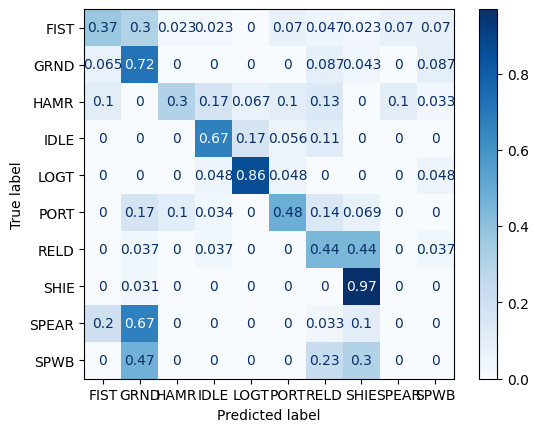

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

model.load_weights("best_model_fold_2.h5")
arr = np.array(test_x)
print(arr.shape)
test_y_predict = np.argmax(model.predict(arr), axis=-1)

print(type(test_x))
print(test_y_predict)
differences = np.sum(test_y_predict != test_y)
print((test_y_predict.shape[0] - differences) / test_y_predict.shape[0])

labels = ["FIST", "GRND", "HAMR", "IDLE", "LOGT", "PORT", "RELD", "SHIE", "SPEAR", "SPWB"]
cm = confusion_matrix(test_y, test_y_predict)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

## Export Test Data and Classification Results to TXT for reference

In [ ]:
# Store test data in a file
string = ""
for test_case in test_x.to_numpy():
  for feature in test_case:
    string = string + str(feature) + "\n"
with open(f"test_x.txt", "w") as f:
  f.write(string)
  f.close()

In [ ]:
# Store classification in a file
string = ""
for result in test_y_predict:
  string = string + str(result) + "\n"
with open(f"test_y_predict.txt", "w") as f:
  f.write(string)
  f.close()

## Model Inspection

In [ ]:
model.load_weights("best_model_fold_2.h5")
# Get weights & biases (in numpy arrays)
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
second_layer_weights = model.layers[1].get_weights()[0]
second_layer_biases  = model.layers[1].get_weights()[1]
third_layer_weights = model.layers[2].get_weights()[0]
third_layer_biases  = model.layers[2].get_weights()[1]

In [ ]:
# Visualise
model.summary()
print("First layer weights shape:")
print(first_layer_weights.shape)
print("First layer biases:")
print(first_layer_biases.shape)
print("Second layer weights shape:")
print(second_layer_weights.shape)
print("Second layer biases:")
print(second_layer_biases.shape)
print("Third layer weights shape:")
print(third_layer_weights.shape)
print("third layer biases:")
print(third_layer_biases.shape)

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_216 (Dense)           (None, 48)                3216      
                                                                 
 dense_217 (Dense)           (None, 24)                1176      
                                                                 
 dense_218 (Dense)           (None, 10)                250       
                                                                 
Total params: 4642 (18.13 KB)
Trainable params: 4642 (18.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
First layer weights shape:
(66, 48)
First layer biases:
(48,)
Second layer weights shape:
(48, 24)
Second layer biases:
(24,)
Third layer weights shape:
(24, 10)
third layer biases:
(10,)


##Print MLP weights and biases

In [ ]:
# Store weights in a file
layer1weight_string = ""
for weight in first_layer_weights:
  for number in weight:
    layer1weight_string = layer1weight_string + str(number) + ", "
  layer1weight_string = layer1weight_string + "\n"


layer2weight_string = ""
for weight in second_layer_weights:
  for number in weight:
    layer2weight_string = layer2weight_string + str(number) + ","
  layer2weight_string = layer2weight_string + "\n"


layer3weight_string = ""
for weight in third_layer_weights:
  for number in weight:
    layer3weight_string = layer3weight_string + str(number) + ","
  layer3weight_string = layer3weight_string + "\n"


# Store biases in a file
layer1bias_string = ""
for bias in first_layer_biases:
    layer1bias_string = layer1bias_string + str(bias) + ","


layer2bias_string = ""
for bias in second_layer_biases:
    layer2bias_string = layer2bias_string + str(bias) + ","



layer3bias_string = ""
for bias in third_layer_biases:
    layer3bias_string = layer3bias_string + str(bias) + ","
print(layer3bias_string)

0.017461628,0.11728046,-0.0073789842,-0.08050655,-0.011572732,-0.06669292,0.04974657,0.0089766355,-0.03294149,-0.009047385,


## Download to local

In [ ]:
os.listdir()

['.config',
 'portal_raw.csv',
 'best_model_fold_3.h5',
 'best_model_fold_2.h5',
 'spear_raw.csv',
 'reload_raw.csv',
 'spiderweb_raw.csv',
 'idle_raw.csv',
 'logout_raw.csv',
 'best_model_fold_5.h5',
 'hammer_raw.csv',
 'best_model_fold_1.h5',
 'best_model_fold_4.h5',
 'grenade_raw.csv',
 'fist_raw.csv',
 'shield_raw.csv',
 'sample_data']

In [ ]:
files.download("test_x.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("best_model_fold_2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("aug_x.csv")
files.download("aug_y.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>